In [2]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
# import warnings; warnings.simplefilter('ignore')

import sys
import os
sys.path.append(os.path.abspath('../'))
import abupy

only use pandas calc nd, please install talib!


# 量化相关性分析

## B1 皮尔逊相关系数

In [20]:
arr1 = np.random.rand(10000)
arr2 = np.random.rand(10000)

corr = np.cov(arr1, arr2) / np.std(arr1) * np.std(arr2)
corr

array([[ 0.08289574, -0.00012222],
       [-0.00012222,  0.08173523]])

In [21]:
corr[0, 1]

-0.00012221864594111822

In [22]:
np.corrcoef(arr1, arr2)[0, 1]

-0.0014847957888365656

## B2 斯皮尔曼秩相关系数

In [23]:
arr1 = np.random.rand(10000)
arr2 = arr1 + np.random.normal(0, .2, 10000)
np.corrcoef(arr1, arr2)[0, 1]

0.81991979887227706

In [24]:
import scipy.stats as stats
demo_list = [1, 2, 10, 100, 2, 1000]
print('原始序列: ', demo_list)
print('序列的秩: ', list(stats.rankdata(demo_list)))

原始序列:  [1, 2, 10, 100, 2, 1000]
序列的秩:  [1.0, 2.5, 4.0, 5.0, 2.5, 6.0]


In [25]:
# 实现斯皮尔曼秩相关系数
def spearmanr(a, b=None, axis=0):
    a, outaxis = _chk_asarray(a, axis)
    ar = np.apply_along_axis(stats.rankdata, outaxis, a)
    br = None
    if b is not None:
        b, axisout = _chk_asarray(b, axis)
        br = np.apply_along_axis(stats.rankdata, axisout, b)
    return np.corrcoef(ar, br, rowvar=outaxis)

def _chk_asarray(a, axis):
    if axis is None:
        a = np.ravel(a)
        outaxis = 0
    else:
        a = np.asarray(a)
        outaxis = axis
    if a.ndim == 0:
        a = np.atleast_1d(a)
    return a, outaxis

In [28]:
%time spearmanr(arr1, arr2)[0, 1]

CPU times: user 3.57 ms, sys: 1.06 ms, total: 4.64 ms
Wall time: 3.06 ms


0.82927485033674841

### scipy.stats中直接封装斯皮尔曼秩相关系数函数stats.spearmanr()函数

In [29]:
# 注意下面的方法速度没有上述自己实现计算spearmanr相关系数的方法快，因为附加计算了pvalue
%time stats.spearmanr(arr1, arr2)

CPU times: user 4.76 ms, sys: 1.7 ms, total: 6.46 ms
Wall time: 4.19 ms


SpearmanrResult(correlation=0.82927485033674841, pvalue=0.0)

## B3 相关性使用示例

### 【示例1】使用abu量化系统中的ABuSimilar.find_similar_with_xxx()函数找到与目标股票相关程度最高的股票可视化，如下代码返回与特斯拉电动车相关性的分析结果

find_similar_with_cnt可视化与tsla相关top10，以及tsla相关性dict：cmp_cnt=252(252天)，加权相关rolling=True，E_CORE_TYPE_PEARS(皮尔逊)

_all_market_net_cg cost 41.933s


[('usTSLA', 1.0), ('usSINA', 0.45565379371028253), ('usWB', 0.44811939073120288), ('usAEH', 0.37792534372729375), ('usCRESY', 0.37347584342214574), ('us.IXIC', 0.36856818073255937), ('usCVG', 0.36841463066151853), ('usOCN', 0.36412381487296047), ('usYHOO', 0.36217456000137549), ('usNOW', 0.3575007487227041)]


rolling_corr cost 16.546s


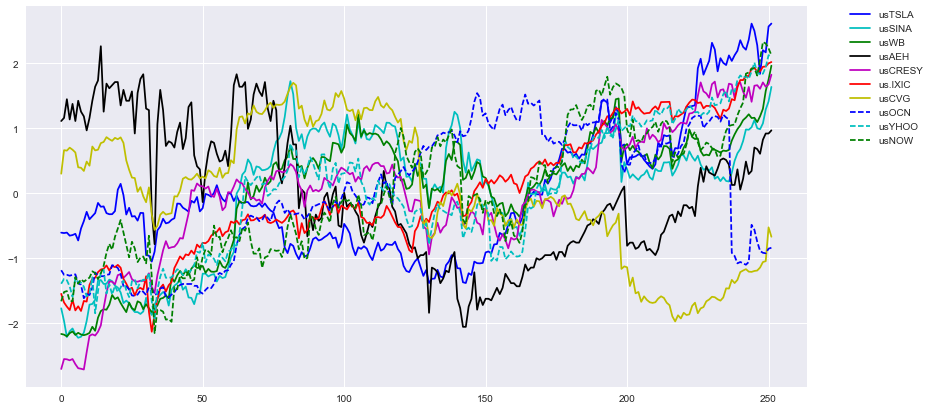

CPU times: user 18.6 s, sys: 1.52 s, total: 20.1 s
Wall time: 59.1 s


In [2]:
%%time
from abupy import find_similar_with_cnt, ECoreCorrType
net_cg_ret = find_similar_with_cnt('usTSLA', cmp_cnt=252, show_cnt=10, rolling=True, \
                      show=True, corr_type=ECoreCorrType.E_CORE_TYPE_PEARS)

find_similar_with_se可视化与tsla相关top10，以及tsla相关性dict：从'2012-01-01'直到'2017-01-01'5年数据，非加权相关，皮尔逊

data from local. run ABu.run_kl_update if you want to get the latest data.


_all_market_net_cg cost 103.558s


[('usTSLA', 1.0), ('us.INX', 0.35868988119392081), ('usPCLN', 0.34281558334427603), ('usMTD', 0.31353428492370067), ('us.DJI', 0.31148022214930954), ('usGAM', 0.3092337834459431), ('usSCTY', 0.30682122956064173), ('usQIHU', 0.30515914393980509), ('usAMG', 0.30452924828500511), ('usSPLK', 0.3020453829031991)]


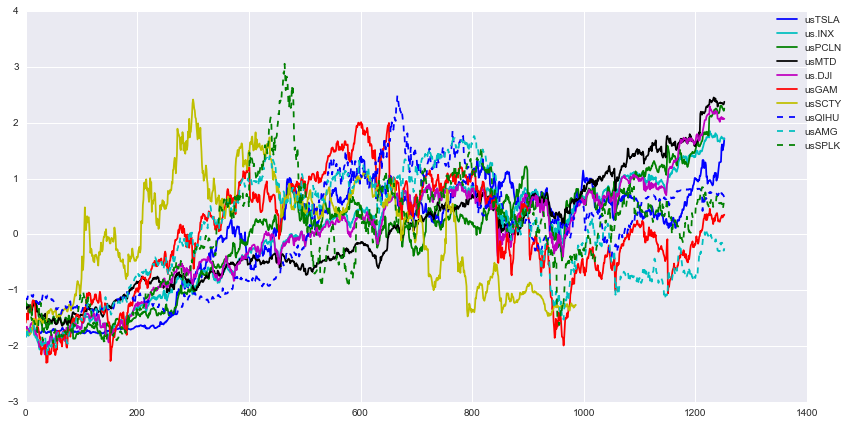

CPU times: user 3.92 s, sys: 1.92 s, total: 5.84 s
Wall time: 1min 44s


In [5]:
%%time
from abupy import find_similar_with_se, ECoreCorrType
net_cg_ret = find_similar_with_se('usTSLA', start='2012-01-01', end='2017-01-01', show_cnt=10, rolling=False, \
                      show=True, corr_type=ECoreCorrType.E_CORE_TYPE_PEARS)

find_similar_with_folds可视化与tsla相关top10，以及tsla相关性dict：n_folds=3(3年数据)，非加权相关，E_CORE_TYPE_SPERM斯皮尔曼

data from local. run ABu.run_kl_update if you want to get the latest data.


_all_market_net_cg cost 76.739s


[('usTSLA', 1.0), ('usPCLN', 0.42721518851383583), ('us.INX', 0.41038007255189174), ('usSPLK', 0.40769370594780774), ('usCRM', 0.39482217203231212), ('usULTI', 0.39105157599768919), ('usAMZN', 0.38850238499096329), ('usFB', 0.37960196903066357), ('usGAM', 0.37576196744421753), ('usWDAY', 0.3754854086519086)]


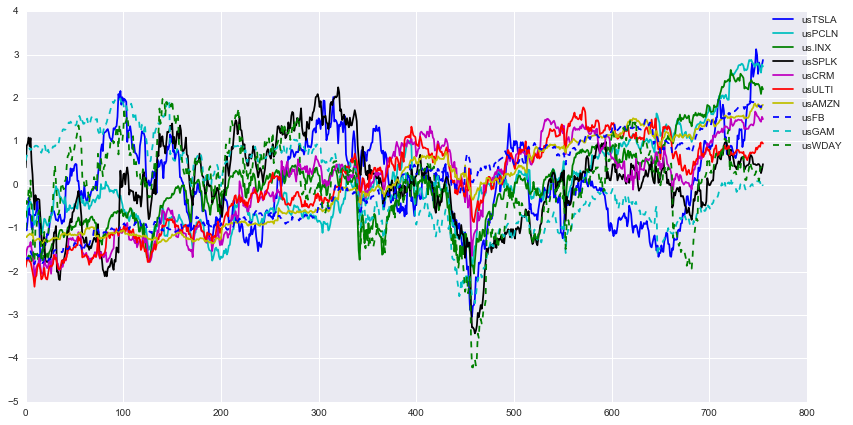

CPU times: user 4.46 s, sys: 1.37 s, total: 5.83 s
Wall time: 1min 18s


In [7]:
%%time
from abupy import find_similar_with_folds, ECoreCorrType
net_cg_ret = find_similar_with_folds('usTSLA', n_folds=3, show_cnt=10, rolling=False, \
                      show=True, corr_type=ECoreCorrType.E_CORE_TYPE_SPERM)

### 【示例2】使用abu量化系统中的ABuTLSimilar.calc_similar()函数计算两支股票相对整个市场的相关性评级rank。

data from local. run ABu.run_kl_update if you want to get the latest data.


_all_market_net_cg cost 42.681s


usAAPL similar rank scoreusTSLA :0.768778280543


make_search_corr_df cost 44.264s


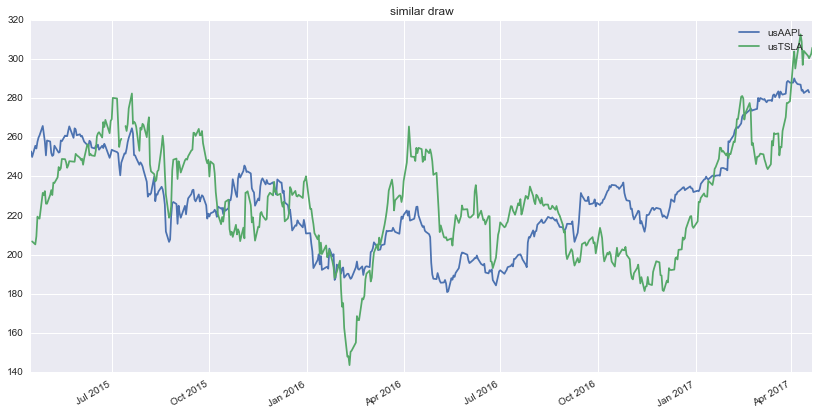

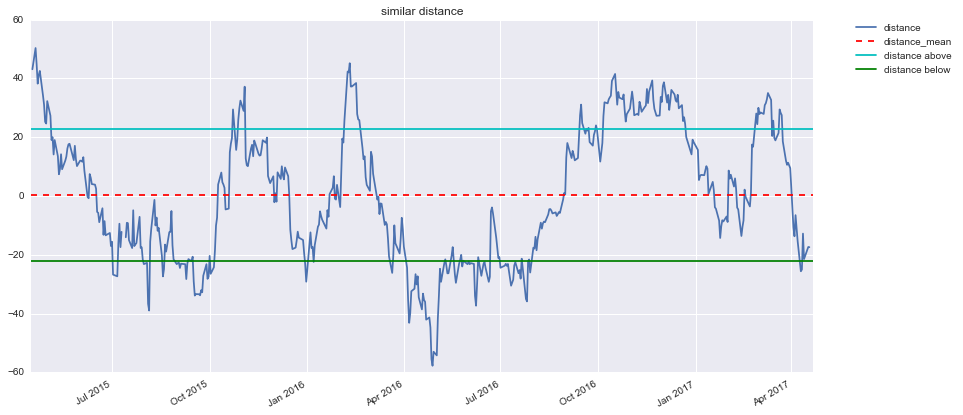

In [9]:
from abupy import tl
# 以整个市场作为观察者，usTSLA与usAAPL的相关性
rank_score, sum_rank = tl.similar.calc_similar('usAAPL', 'usTSLA')

In [11]:
# 以usTSLA作为观察者，它与usAAPL的相关性数值
for ncr in net_cg_ret:
    if ncr[0] == 'usAAPL':
        print(ncr[1])
        break

0.318575592606


### 以整个市场作为观察者，与usTSLA相关性TOP 10可视化

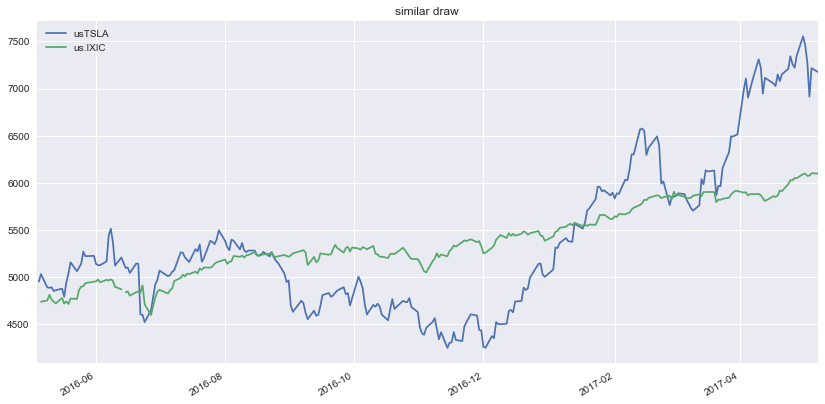

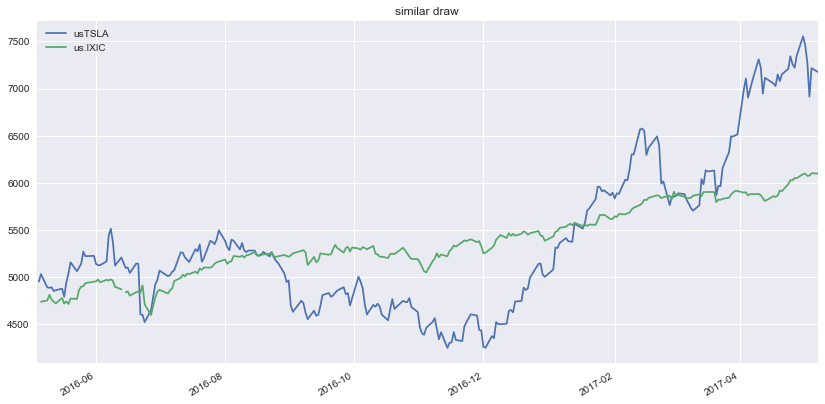

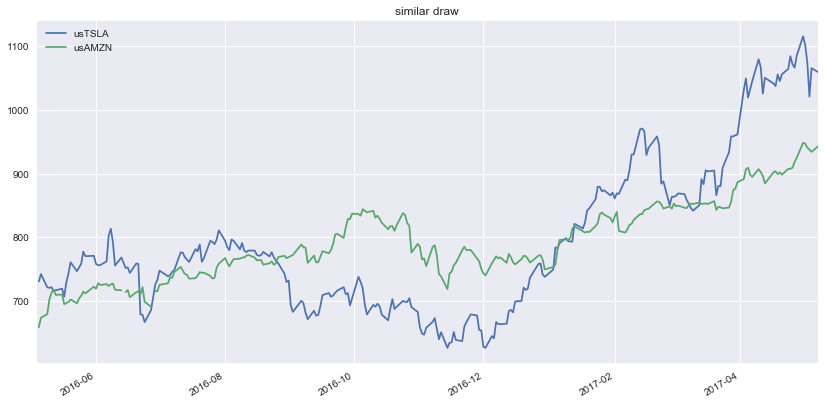

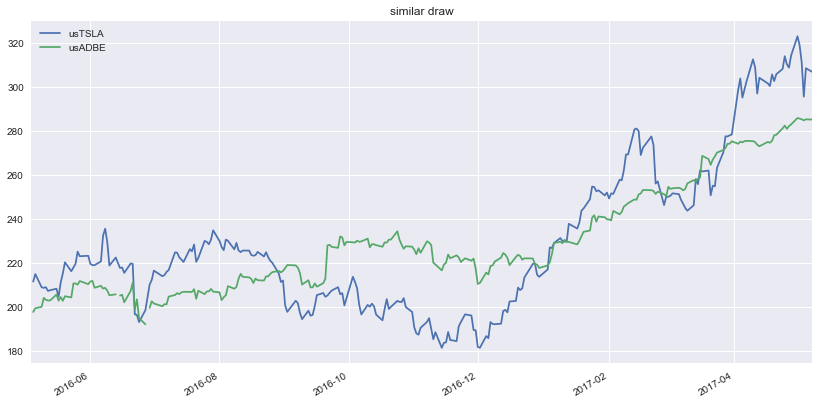

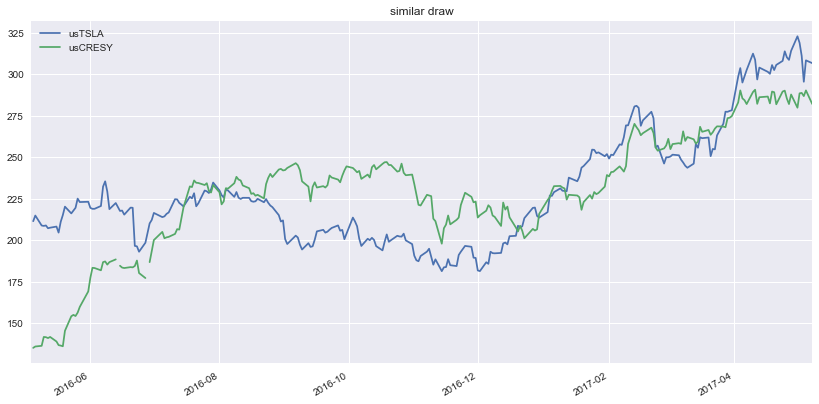

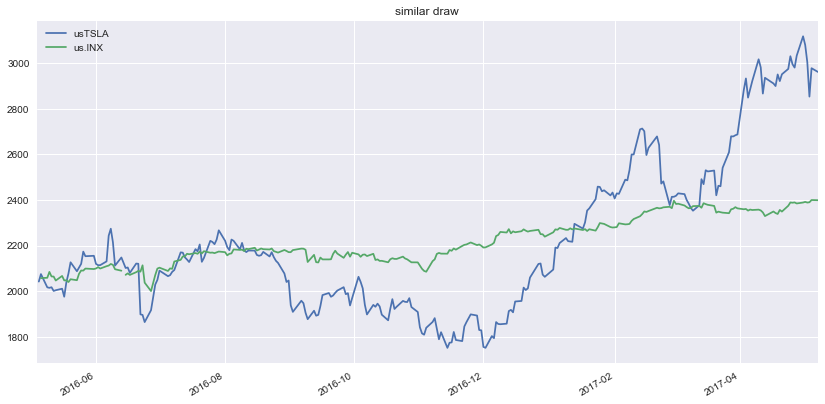

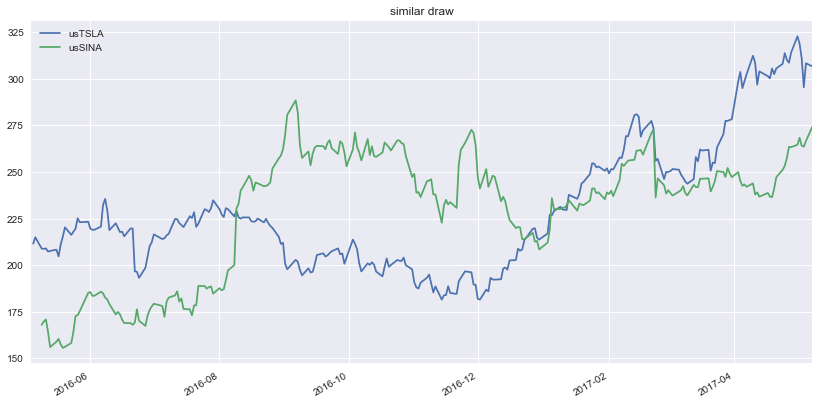

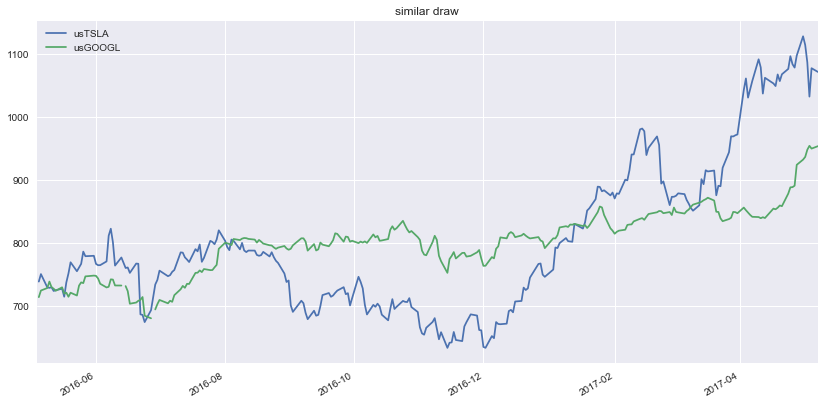

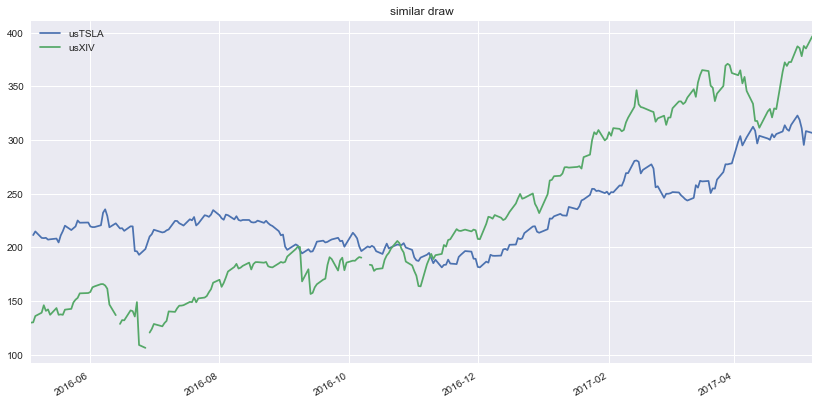

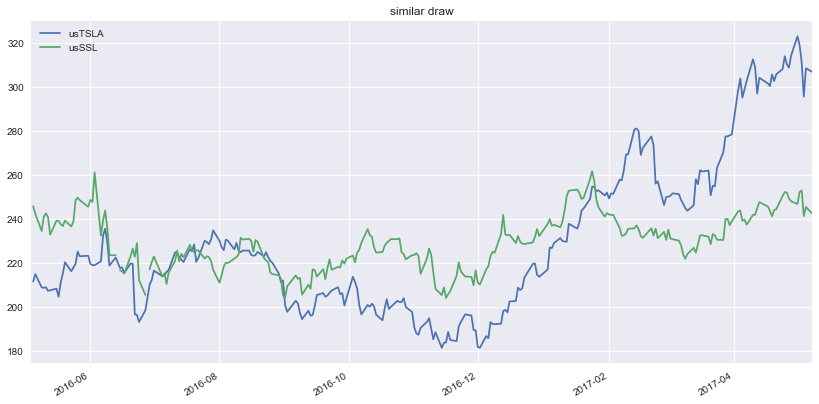

us.IXIC     5.0
us.IXIC     5.0
usAMZN      9.0
usADBE     17.0
usCRESY    21.0
us.INX     23.0
usSINA     24.0
usGOOGL    34.0
usXIV      34.0
usSSL      34.0
dtype: float64

In [7]:
from abupy import tl
tl.similar.calc_similar_top('usTSLA')

### 【示例3】相关与协整组成的一个简单量化选股策略, 使用封装好的函数coint_similar()

data from local. run ABu.run_kl_update if you want to get the latest data.


_all_market_net_cg cost 41.203s
make_search_corr_df cost 42.649s


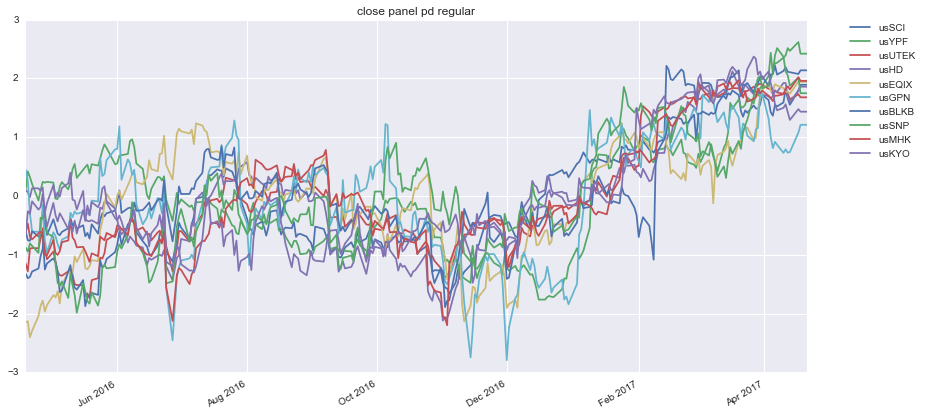

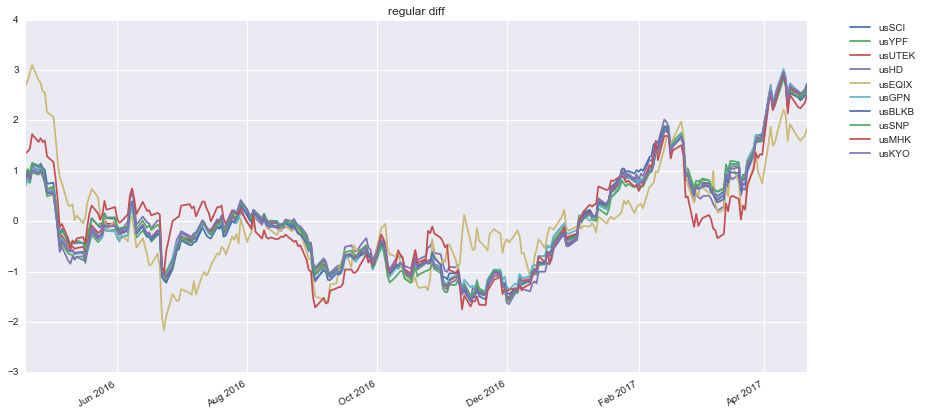

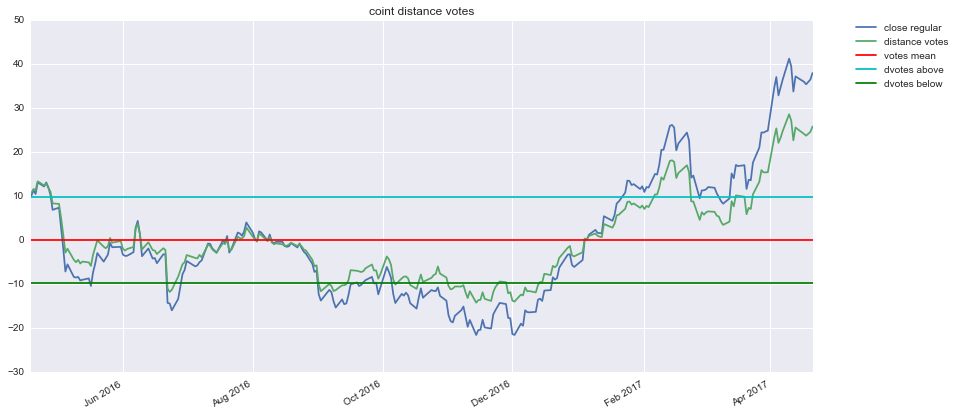

In [13]:
from abupy import tl
tl.similar.coint_similar('usTSLA')

### 【示例4】abu量化系统选股结合相关性，编写相关性选股策略

AbuPickSimilarNTop源代码请自行阅读，只简单示例使用。

In [3]:
from abupy import AbuPickSimilarNTop
from abupy import AbuPickStockWorker
from abupy import AbuBenchmark, AbuCapital, AbuKLManager
from abupy import EMarketDataFetchMode
# 强制使用本地缓存数据
abupy.env.g_data_fetch_mode = EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

In [20]:
benchmark = AbuBenchmark()

# 选股因子AbuPickSimilarNTop， 寻找与usTSLA相关性不低于0.95的股票
# 这里内部使用以整个市场作为观察者方式计算，即取值范围0-1
stock_pickers = [{'class': AbuPickSimilarNTop,
                'similar_stock':'usTSLA', 'threshold_similar_min':0.95}]

# 从这几个股票里进行选股，只是为了演示方便，一般的选股都会是数量比较多的情况比如全市场股票
choice_symbols = ['usNOAH', 'usSFUN', 'usBIDU', 'usAAPL', 'usGOOG', 'usTSLA', 'usWUBA', 'usVIPS']

capital = AbuCapital(1000000, benchmark)
kl_pd_manager = AbuKLManager(benchmark, capital)
stock_pick = AbuPickStockWorker(capital, benchmark, kl_pd_manager, choice_symbols=choice_symbols, stock_pickers=stock_pickers)
stock_pick.fit()
stock_pick.choice_symbols

pid:31589 pick stocks complete:100%


['usBIDU', 'usGOOG', 'usTSLA']

通过选股因子first_choice属性执行批量优先选股操作，具体阅读源代码

In [7]:
benchmark = AbuBenchmark()
capital = AbuCapital(1000000, benchmark)
kl_pd_manager = AbuKLManager(benchmark, capital)

# 选股因子AbuPickSimilarNTop， 寻找与usTSLA相关性不低于0.95的股票
# 通过设置'first_choice':True，进行优先批量操作，默认从对应市场选股
stock_pickers = [{'class': AbuPickSimilarNTop, 'first_choice':True,
                'similar_stock':'usTSLA', 'threshold_similar_min':0.95}]
choice_symbols = None

capital = AbuCapital(1000000, benchmark)
kl_pd_manager = AbuKLManager(benchmark, capital)
stock_pick = AbuPickStockWorker(capital, benchmark, kl_pd_manager, choice_symbols=choice_symbols, stock_pickers=stock_pickers)
stock_pick.fit()
stock_pick.choice_symbols

_all_market_net_cg cost 43.478s


['usTEN',
 'us.IXIC',
 'usLUK',
 'usSCTY',
 'usMTW',
 'usLXK',
 'usFSLR',
 'usIVZ',
 'usPWR',
 'usNM',
 'usXYL',
 'usSPLK',
 'usPCLN',
 'usSNX',
 'usJBL',
 'usQLIK',
 'us.INX',
 'usWCC',
 'usVC',
 'usPTC',
 'usWDAY',
 'usTRAK',
 'usULTI',
 'usBIDU',
 'usLAD',
 'usSANM',
 'usAKAM',
 'usMENT',
 'usSB',
 'usJCI',
 'usWAB',
 'usMPWR',
 'usFLEX',
 'usFB',
 'usTECD',
 'usTEX',
 'usAMG',
 'usDWRE',
 'usIEX',
 'usRATE',
 'usCTS',
 'usMKSI',
 'usUSCR',
 'usTPC',
 'usCMI',
 'usAXE',
 'usPLXS',
 'usLECO',
 'usGT',
 'usCRM',
 'usARW',
 'usROP',
 'usAMBA',
 'usDATA',
 'usBID',
 'usAL',
 'usPANW',
 'usAN',
 'usDLPH',
 'usNDSN',
 'usTHRM',
 'usPH',
 'usFLR',
 'usOI',
 'usCDNS',
 'usR',
 'usNOW',
 'usANSS',
 'usLEA',
 'usEFII',
 'usGMT',
 'usCBT',
 'usVMW',
 'usBITA',
 'usBRKS',
 'usFEIC',
 'usLNKD',
 'usCTXS',
 'usTROW',
 'usP',
 'usWEX',
 'usAGX',
 'usYELP',
 'usGWRE',
 'usETN',
 'usSNPS',
 'usIDTI',
 'usNVGS',
 'usALSN',
 'usNATI',
 'usIMAX',
 'usDANG',
 'usAIN',
 'usFET',
 'usHSC',
 'usCLC',
 'usD